In [1]:
import pandas as pd
import numpy as np

In [2]:
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,20,70]}
df = pd.DataFrame(data, index=['a','b','c','d'] )
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


## 추가

In [3]:
df.loc['e']=[1,2,3] # 있으면 수정 없으면 추가
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70
e,1,2,3


In [4]:
df['test'] = [1,2,3,4,5] # 있으면 수정 없으면 추가
df

,eng,kor,math,test
a,10,20,90,1
b,30,40,50,2
c,50,60,20,3
d,70,80,70,4
e,1,2,3,5


In [6]:
df['sum'] = df['eng']+df['kor']
df

## 삭제

In [9]:
df.drop(index=['a','b','e'])  # inplace=True 해야 df에 적용됨

,eng,kor,math,test,sum
c,50,60,20,3,110
d,70,80,70,4,150


In [10]:
df.drop(columns=['test','sum'])  # inplace=True 해야 df에 적용됨

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70
e,1,2,3


In [11]:
df.drop(index=['a','e'],columns=['test','sum'])  # inplace=True 해야 df에 적용됨

,eng,kor,math
b,30,40,50
c,50,60,20
d,70,80,70


In [12]:
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,20,70]}
df = pd.DataFrame(data, index=['a','b','c','d'] )
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [14]:
print(type(df.columns))

<class 'pandas.core.indexes.base.Index'>


In [16]:
# df[['eng','math']]
df[df.columns.difference(['kor'])]  # kor제외한 나머지 보여줌

,eng,math
a,10,90
b,30,50
c,50,20
d,70,70


## 결측 데이터 처리
- 삭제
- 특정값(대푯값) 으로 대체 (평균, 중앙값, 최빈값)

In [29]:
df.loc['b','kor'] = np.nan

In [19]:
df.loc['b':'c','math']  = np.nan


In [20]:
df

,eng,kor,math
a,10,20.0,90.0
b,30,NaN,NaN
c,50,60.0,NaN
d,70,80.0,70.0


### 결측데이터 확인

In [21]:
df.isna()

,eng,kor,math
a,False,False,False
b,False,True,True
c,False,False,True
d,False,False,False


In [22]:
df.isna().sum()  # 컬럼별 통계값이 디폴트

eng     0
kor     1
math    2
dtype: int64

In [23]:
!pip install missingno

<AxesSubplot:>

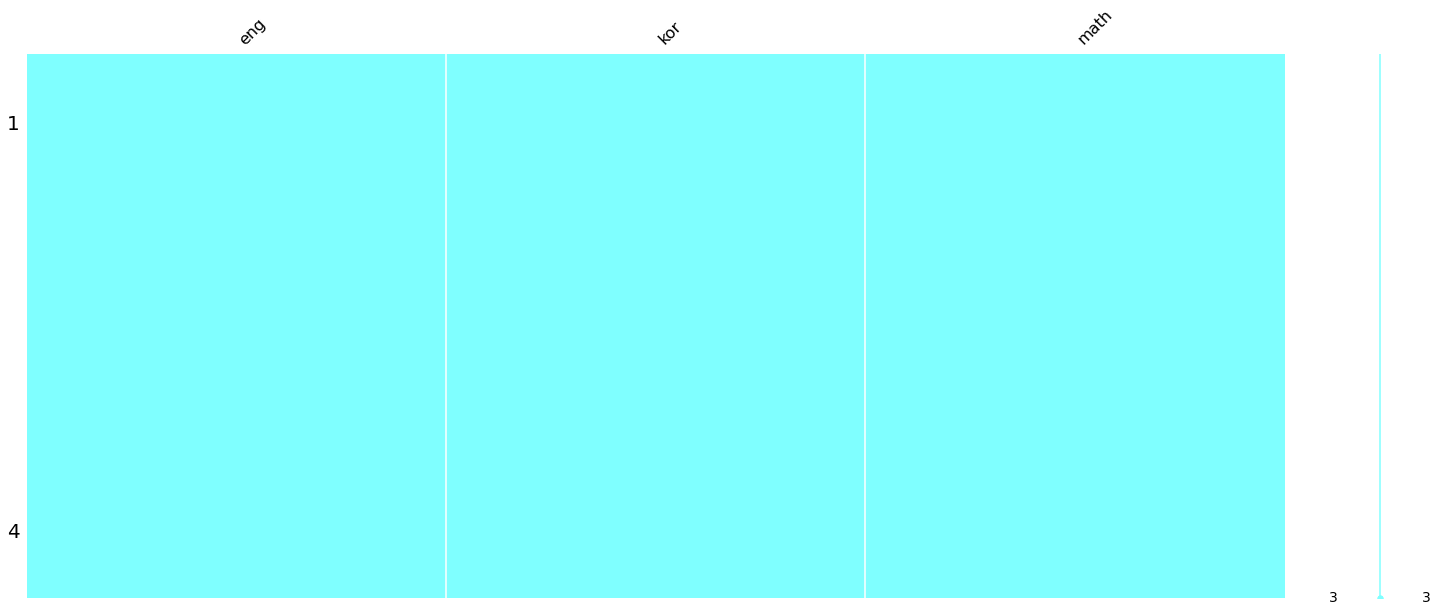

In [44]:
import missingno as mn
mn.matrix(df,color=(0.5,1,1))

### nan 값 채우기

In [26]:
df.fillna(11) # inplace=True 해야 df에 적용됨

,eng,kor,math
a,10,20.0,90.0
b,30,11.0,11.0
c,50,60.0,11.0
d,70,80.0,70.0


In [27]:
# df['kor'] = df['kor'].fillna(11)
df['kor'].fillna(11,inplace=True)
df

### nan 삭제

In [31]:
df.dropna() # nan이 있는 행 삭제

,eng,kor,math
a,10,20.0,90.0
d,70,80.0,70.0


In [33]:
df.dropna(axis=1) # nan이 있는 열 삭제

,eng
a,10
b,30
c,50
d,70


In [34]:
df.dropna(subset=['kor']) # kor에서 nan이 있는 행 삭제
# df['kor'].dropna(inplace=True)

,eng,kor,math
a,10,20.0,90.0
c,50,60.0,NaN
d,70,80.0,70.0


## 정렬

In [36]:
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,20,70]}
df = pd.DataFrame(data, index=['a','b','c','d'] )
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [ ]:
df.sort_values(by='eng')  # 정렬기준 컬럼 지정  # eng기준 오름차순

In [37]:
df.sort_values(by='eng',ascending=False)  # eng기준 내림차순

,eng,kor,math
d,70,80,70
c,50,60,20
b,30,40,50
a,10,20,90


In [38]:
df.loc['c','kor'] = 40

In [40]:
df.sort_values(by=['kor','math'])  # kor을 기준으로 정렬, 동률이면 math 기준으로 정렬

,eng,kor,math
a,10,20,90
c,50,40,20
b,30,40,50
d,70,80,70


In [41]:
df.sort_index()

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,40,20
d,70,80,70


In [42]:
df.sort_index(ascending=False)

,eng,kor,math
d,70,80,70
c,50,40,20
b,30,40,50
a,10,20,90
